In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Load and preprocess

In [2]:
results_df = pd.read_csv('Ongoing exps - Dino - PCA - Dino + PCA segementation exps CSV.csv')

In [3]:
results_df

,model_name,num_pcs,explained_var,abide_stanford_t1,abide_caltech_t1,hcp_t1,hcp_t2
0,unet,NaN,NaN,0.839 +- 0.017,0.763 +- 0.01,0.703 +- 0.02,0.061 +- 0.01
1,dino_resnet_decoder,NaN,NaN,0.798 +- 0.02,0.695 +- 0.01,0.572 +- 0.02,0.354 +- 0.03
2,dino_resnet_decoder_on_pcs,9.0,0.350,0.711 +- 0.02,0.607 +- 0.03,0.464 +- 0.03,0.385 +- 0.03
3,dino_resnet_decoder_on_pcs,30.0,0.750,0.775 +- 0.03,0.65 +- 0.03,0.519 +- 0.03,0.437 +- 0.03
4,dino_resnet_decoder_on_pcs,42.0,0.800,0.787 +- 0.03,0.677 +- 0.03,0.547 +- 0.03,0.439 +- 0.03
5,dino_resnet_decoder_on_pcs,109.0,0.900,0.809 +- 0.02,0.716 +- 0.02,0.509 +- 0.033,0.355 +- 0.03
6,dino_resnet_decoder_on_pcs,232.0,0.950,0.821 +- 0.02,0.759 +- 0.02,0.625 +- 0.03,0.399 +- 0.029
7,dino_resnet_decoder_on_pcs,620.0,0.990,0.773 +- 0.02,0.708 +- 0.02,0.578 +- 0.02,0.357 +- 0.02
8,dino_resnet_decoder_on_pcs,937.0,0.999,0.822 +- 0.02,0.754 +- 0.02,0.613 +- 0.03,0.367 +- 0.03


In [4]:
datasets = ['abide_stanford_t1', 'abide_caltech_t1', 'hcp_t1', 'hcp_t2']

for dataset in datasets:
    results_df[f"{dataset}_mean"] = results_df[dataset].str.split(' ').str[0].astype(float)
    results_df[f"{dataset}_std"] = results_df[dataset].str.split(' ').str[-1].astype(float)

results_df

,model_name,num_pcs,explained_var,abide_stanford_t1,abide_caltech_t1,hcp_t1,hcp_t2,abide_stanford_t1_mean,abide_stanford_t1_std,abide_caltech_t1_mean,abide_caltech_t1_std,hcp_t1_mean,hcp_t1_std,hcp_t2_mean,hcp_t2_std
0,unet,NaN,NaN,0.839 +- 0.017,0.763 +- 0.01,0.703 +- 0.02,0.061 +- 0.01,0.839,0.017,0.763,0.01,0.703,0.020,0.061,0.010
1,dino_resnet_decoder,NaN,NaN,0.798 +- 0.02,0.695 +- 0.01,0.572 +- 0.02,0.354 +- 0.03,0.798,0.020,0.695,0.01,0.572,0.020,0.354,0.030
2,dino_resnet_decoder_on_pcs,9.0,0.350,0.711 +- 0.02,0.607 +- 0.03,0.464 +- 0.03,0.385 +- 0.03,0.711,0.020,0.607,0.03,0.464,0.030,0.385,0.030
3,dino_resnet_decoder_on_pcs,30.0,0.750,0.775 +- 0.03,0.65 +- 0.03,0.519 +- 0.03,0.437 +- 0.03,0.775,0.030,0.650,0.03,0.519,0.030,0.437,0.030
4,dino_resnet_decoder_on_pcs,42.0,0.800,0.787 +- 0.03,0.677 +- 0.03,0.547 +- 0.03,0.439 +- 0.03,0.787,0.030,0.677,0.03,0.547,0.030,0.439,0.030
5,dino_resnet_decoder_on_pcs,109.0,0.900,0.809 +- 0.02,0.716 +- 0.02,0.509 +- 0.033,0.355 +- 0.03,0.809,0.020,0.716,0.02,0.509,0.033,0.355,0.030
6,dino_resnet_decoder_on_pcs,232.0,0.950,0.821 +- 0.02,0.759 +- 0.02,0.625 +- 0.03,0.399 +- 0.029,0.821,0.020,0.759,0.02,0.625,0.030,0.399,0.029
7,dino_resnet_decoder_on_pcs,620.0,0.990,0.773 +- 0.02,0.708 +- 0.02,0.578 +- 0.02,0.357 +- 0.02,0.773,0.020,0.708,0.02,0.578,0.020,0.357,0.020
8,dino_resnet_decoder_on_pcs,937.0,0.999,0.822 +- 0.02,0.754 +- 0.02,0.613 +- 0.03,0.367 +- 0.03,0.822,0.020,0.754,0.02,0.613,0.030,0.367,0.030


### Plot Performance

In [5]:
results_df[results_df.model_name == 'unet']['abide_stanford_t1_mean'].values

array([0.839])

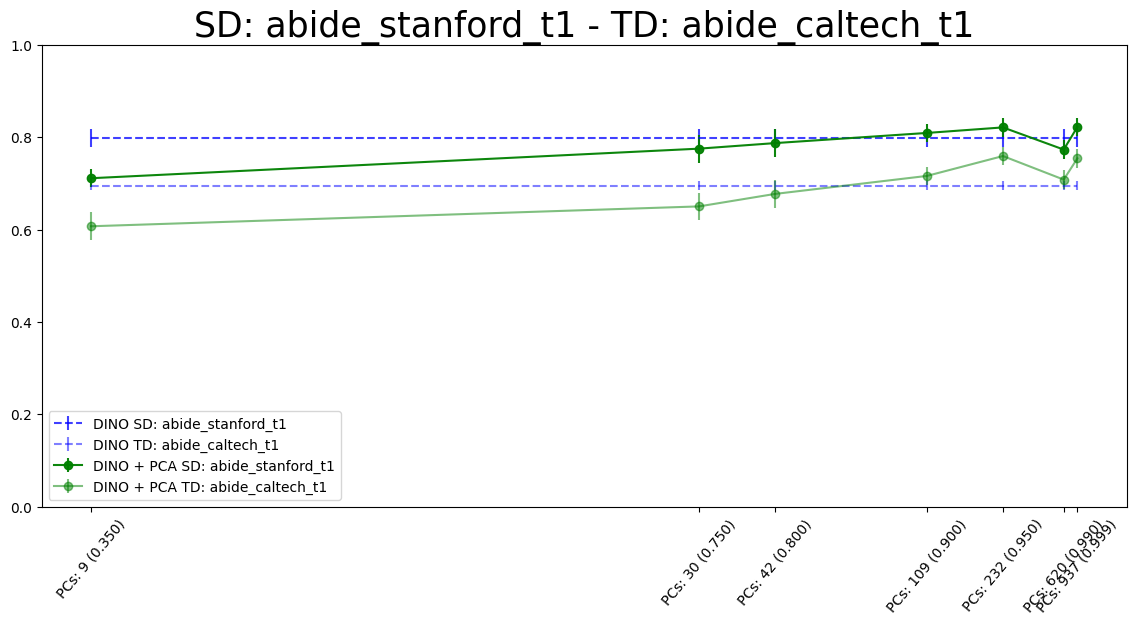

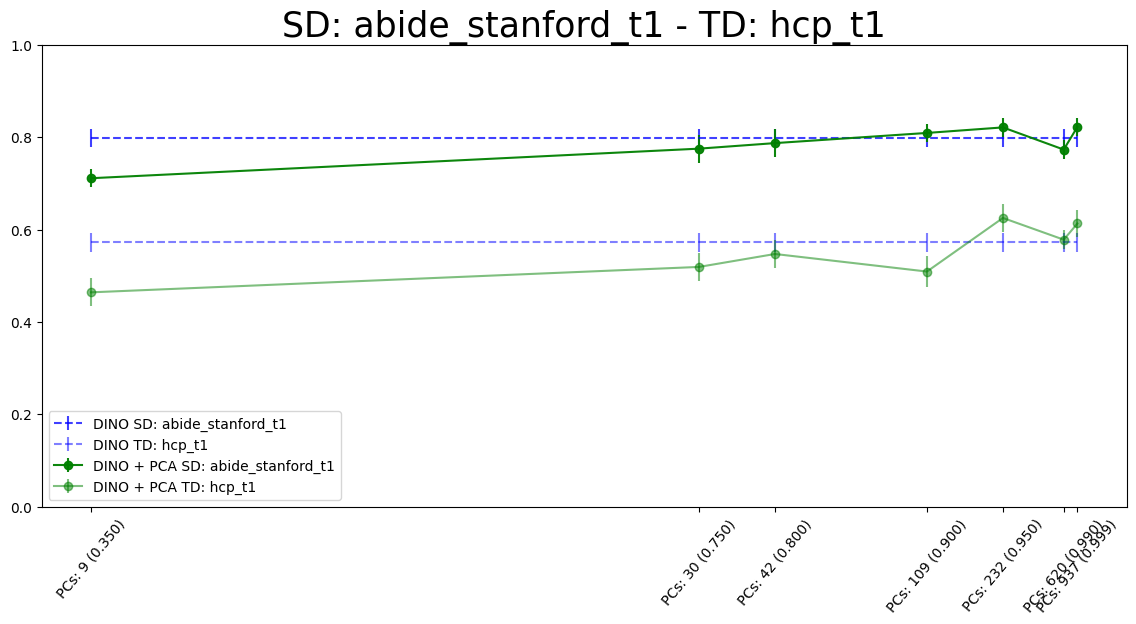

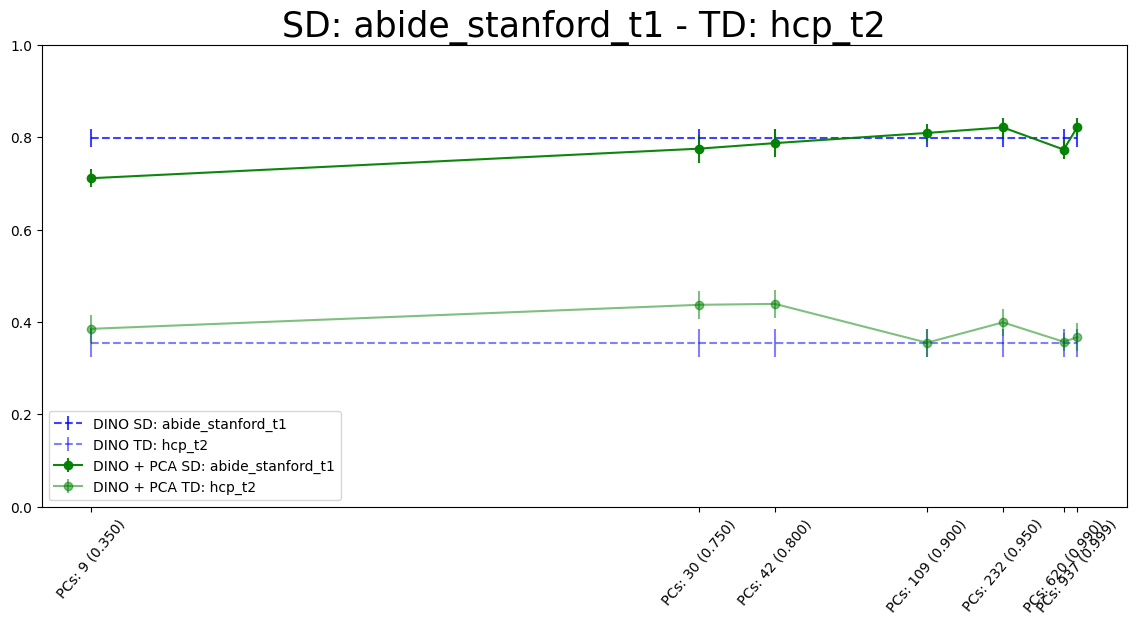

In [6]:
source_domain = 'abide_stanford_t1'
target_domains = ['abide_caltech_t1', 'hcp_t1', 'hcp_t2']

unet_color = 'orange'
dino_color = 'blue'
dino_pca_color = 'green'

plot_unet = False

for target_domain in target_domains:
    # Get Unet source domain and target domain performance as horizontal lines with error bars
    unet_sd_mean = results_df[results_df.model_name == 'unet'][f"{source_domain}_mean"].values[0]
    unet_sd_std = results_df[results_df.model_name == 'unet'][f"{source_domain}_std"].values[0]

    unet_td_mean = results_df[results_df.model_name == 'unet'][f"{target_domain}_mean"].values[0]
    unet_td_std = results_df[results_df.model_name == 'unet'][f"{target_domain}_std"].values[0]

    # Get dino source domain and target domain performance as horizontal lines with error bars
    dino_sd_mean = results_df[results_df.model_name == 'dino_resnet_decoder'][f"{source_domain}_mean"].values[0]
    dino_sd_std = results_df[results_df.model_name == 'dino_resnet_decoder'][f"{source_domain}_std"].values[0]

    dino_td_mean = results_df[results_df.model_name == 'dino_resnet_decoder'][f"{target_domain}_mean"].values[0]
    dino_td_std = results_df[results_df.model_name == 'dino_resnet_decoder'][f"{target_domain}_std"].values[0]

    # Get the PCA source domain and target domain performance as horizontal lines with error bars
    pca_sd_mean = results_df[results_df.model_name == 'dino_resnet_decoder_on_pcs'][['num_pcs', 'explained_var', f"{source_domain}_mean"]]
    pca_sd_std = results_df[results_df.model_name == 'dino_resnet_decoder_on_pcs'][['num_pcs', 'explained_var', f"{source_domain}_std"]]
    
    pca_td_mean = results_df[results_df.model_name == 'dino_resnet_decoder_on_pcs'][['num_pcs', 'explained_var', f"{target_domain}_mean"]]
    pca_td_std = results_df[results_df.model_name == 'dino_resnet_decoder_on_pcs'][['num_pcs', 'explained_var', f"{target_domain}_std"]]

    x_var = pca_sd_mean['explained_var']
    x_pcs = pca_sd_mean['num_pcs']

    # Plot the results with error bars but using a scatter plot
    fig = plt.figure(figsize=(14, 6))

    # Plot Unet performance
    if plot_unet:
        plt.errorbar(x=x_var, y=[unet_sd_mean] * len(x_var), yerr=[unet_sd_std] * len(x_var), label=f"Unet SD: {source_domain}", fmt='--', color=unet_color, alpha = 0.75)
        plt.errorbar(x=x_var, y=[unet_td_mean] * len(x_var), yerr=[unet_td_std] * len(x_var), label=f"Unet TD: {target_domain}", fmt='--', color=unet_color, alpha = 0.5)    

    # Plot regular Dino Perfomance
    plt.errorbar(x=x_var, y=[dino_sd_mean] * len(x_var), yerr=[dino_sd_std] * len(x_var), label=f"DINO SD: {source_domain}", fmt='--', color=dino_color, alpha = 0.75)
    plt.errorbar(x=x_var, y=[dino_td_mean] * len(x_var), yerr=[dino_td_std] * len(x_var), label=f"DINO TD: {target_domain}", fmt='--', color=dino_color, alpha = 0.5)

    plt.errorbar(x=pca_sd_mean['explained_var'], y=pca_sd_mean[f"{source_domain}_mean"], 
                 yerr=pca_sd_std[f"{source_domain}_std"], label=f"DINO + PCA SD: {source_domain}", 
                 fmt='-o', color=dino_pca_color, alpha = 0.95)
    plt.errorbar(x=pca_td_mean['explained_var'], y=pca_td_mean[f"{target_domain}_mean"], 
                 yerr=pca_td_std[f"{target_domain}_std"], label=f"DINO + PCA TD: {target_domain}", 
                 fmt='-o', color=dino_pca_color, alpha = 0.5)

    # Display only ticks for the actual values in the x-axis of the plot, whiile using log scale
    plt.xticks(x_var, [f'PCs: {int(pc)} ({var:.3f})' for pc, var in zip(x_pcs, x_var)], rotation=50)
    
    # make y-axis between 0 and 1
    plt.ylim(0, 1)
    plt.legend()
    plt.title(f"SD: {source_domain} - TD: {target_domain}", fontdict={'fontsize': 25})

    plt.show()

    

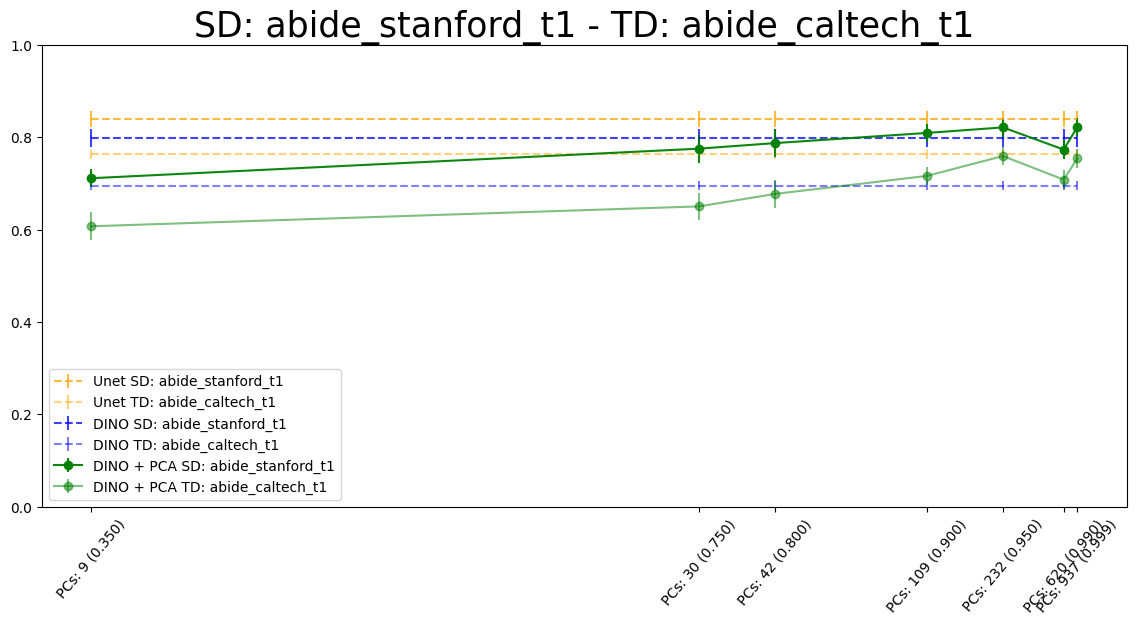

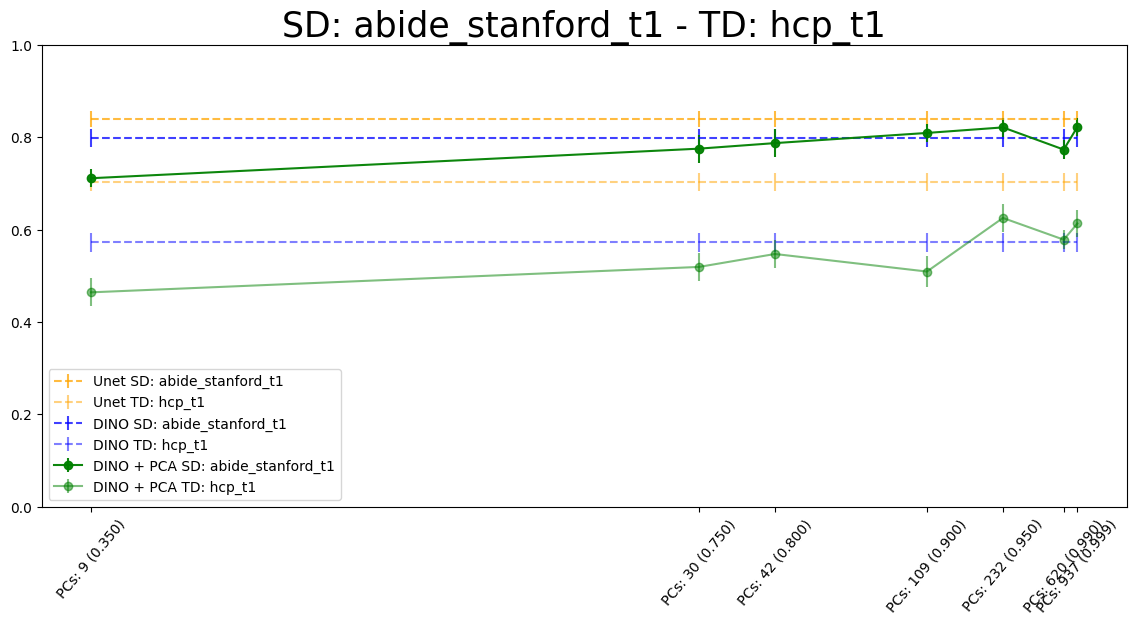

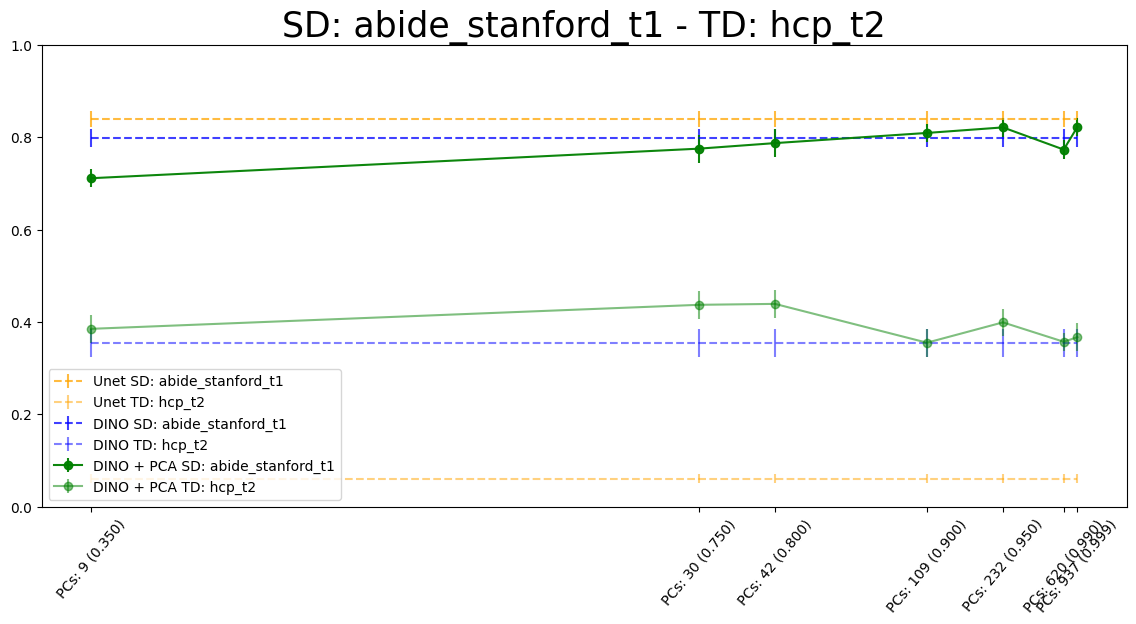

In [7]:
source_domain = 'abide_stanford_t1'
target_domains = ['abide_caltech_t1', 'hcp_t1', 'hcp_t2']

unet_color = 'orange'
dino_color = 'blue'
dino_pca_color = 'green'

plot_unet = True

for target_domain in target_domains:
    # Get Unet source domain and target domain performance as horizontal lines with error bars
    unet_sd_mean = results_df[results_df.model_name == 'unet'][f"{source_domain}_mean"].values[0]
    unet_sd_std = results_df[results_df.model_name == 'unet'][f"{source_domain}_std"].values[0]

    unet_td_mean = results_df[results_df.model_name == 'unet'][f"{target_domain}_mean"].values[0]
    unet_td_std = results_df[results_df.model_name == 'unet'][f"{target_domain}_std"].values[0]

    # Get dino source domain and target domain performance as horizontal lines with error bars
    dino_sd_mean = results_df[results_df.model_name == 'dino_resnet_decoder'][f"{source_domain}_mean"].values[0]
    dino_sd_std = results_df[results_df.model_name == 'dino_resnet_decoder'][f"{source_domain}_std"].values[0]

    dino_td_mean = results_df[results_df.model_name == 'dino_resnet_decoder'][f"{target_domain}_mean"].values[0]
    dino_td_std = results_df[results_df.model_name == 'dino_resnet_decoder'][f"{target_domain}_std"].values[0]

    # Get the PCA source domain and target domain performance as horizontal lines with error bars
    pca_sd_mean = results_df[results_df.model_name == 'dino_resnet_decoder_on_pcs'][['num_pcs', 'explained_var', f"{source_domain}_mean"]]
    pca_sd_std = results_df[results_df.model_name == 'dino_resnet_decoder_on_pcs'][['num_pcs', 'explained_var', f"{source_domain}_std"]]
    
    pca_td_mean = results_df[results_df.model_name == 'dino_resnet_decoder_on_pcs'][['num_pcs', 'explained_var', f"{target_domain}_mean"]]
    pca_td_std = results_df[results_df.model_name == 'dino_resnet_decoder_on_pcs'][['num_pcs', 'explained_var', f"{target_domain}_std"]]

    x_var = pca_sd_mean['explained_var']
    x_pcs = pca_sd_mean['num_pcs']

    # Plot the results with error bars but using a scatter plot
    fig = plt.figure(figsize=(14, 6))

    # Plot Unet performance
    if plot_unet:
        plt.errorbar(x=x_var, y=[unet_sd_mean] * len(x_var), yerr=[unet_sd_std] * len(x_var), label=f"Unet SD: {source_domain}", fmt='--', color=unet_color, alpha = 0.75)
        plt.errorbar(x=x_var, y=[unet_td_mean] * len(x_var), yerr=[unet_td_std] * len(x_var), label=f"Unet TD: {target_domain}", fmt='--', color=unet_color, alpha = 0.5)    

    # Plot regular Dino Perfomance
    plt.errorbar(x=x_var, y=[dino_sd_mean] * len(x_var), yerr=[dino_sd_std] * len(x_var), label=f"DINO SD: {source_domain}", fmt='--', color=dino_color, alpha = 0.75)
    plt.errorbar(x=x_var, y=[dino_td_mean] * len(x_var), yerr=[dino_td_std] * len(x_var), label=f"DINO TD: {target_domain}", fmt='--', color=dino_color, alpha = 0.5)

    plt.errorbar(x=pca_sd_mean['explained_var'], y=pca_sd_mean[f"{source_domain}_mean"], 
                 yerr=pca_sd_std[f"{source_domain}_std"], label=f"DINO + PCA SD: {source_domain}", 
                 fmt='-o', color=dino_pca_color, alpha = 0.95)
    plt.errorbar(x=pca_td_mean['explained_var'], y=pca_td_mean[f"{target_domain}_mean"], 
                 yerr=pca_td_std[f"{target_domain}_std"], label=f"DINO + PCA TD: {target_domain}", 
                 fmt='-o', color=dino_pca_color, alpha = 0.5)

    # Display only ticks for the actual values in the x-axis of the plot, whiile using log scale
    plt.xticks(x_var, [f'PCs: {int(pc)} ({var:.3f})' for pc, var in zip(x_pcs, x_var)], rotation=50)
    
    # make y-axis between 0 and 1
    plt.ylim(0, 1)
    plt.legend()
    plt.title(f"SD: {source_domain} - TD: {target_domain}", fontdict={'fontsize': 25})

    plt.show()


## With normalization of the Dino Features per image per channel

In [8]:
results_df = pd.read_csv('/scratch/jbermeo/MastersThesisUIASegmentation/notebooks/dino/PCA - Dino + PCA segementation exps CSV + norm per img.csv')

In [9]:
results_df

,model_name,num_pcs,explained_var,abide_stanford_t1,hcp_t2
0,unet,NaN,NaN,0.839 +- 0.017,0.061 +- 0.01
1,dino_resnet_decoder,NaN,NaN,0.798 +- 0.02,0.354 +- 0.03
2,dino_resnet_decoder_on_pcs,9.0,0.350,0.559 +- 0.03,0.276 +- 0.02
3,dino_resnet_decoder_on_pcs,30.0,0.750,0.715 +- 0.02,0.395 +- 0.03
4,dino_resnet_decoder_on_pcs,42.0,0.800,0.721 +- 0.02,0.465 +- 0.03
5,dino_resnet_decoder_on_pcs,109.0,0.900,0.795 +- 0.02,0.395 +- 0.04
6,dino_resnet_decoder_on_pcs,232.0,0.950,0.752 +- 0.02,0.401 +- 0.02
7,dino_resnet_decoder_on_pcs,620.0,0.990,0.676 +- 0.02,0.357 +- 0.03
8,dino_resnet_decoder_on_pcs,937.0,0.999,0.683 +- 0.02,0.314 +- 0.02


In [10]:
datasets = ['abide_stanford_t1', 'hcp_t2']

for dataset in datasets:
    results_df[f"{dataset}_mean"] = results_df[dataset].str.split(' ').str[0].astype(float)
    results_df[f"{dataset}_std"] = results_df[dataset].str.split(' ').str[-1].astype(float)

results_df

,model_name,num_pcs,explained_var,abide_stanford_t1,hcp_t2,abide_stanford_t1_mean,abide_stanford_t1_std,hcp_t2_mean,hcp_t2_std
0,unet,NaN,NaN,0.839 +- 0.017,0.061 +- 0.01,0.839,0.017,0.061,0.01
1,dino_resnet_decoder,NaN,NaN,0.798 +- 0.02,0.354 +- 0.03,0.798,0.020,0.354,0.03
2,dino_resnet_decoder_on_pcs,9.0,0.350,0.559 +- 0.03,0.276 +- 0.02,0.559,0.030,0.276,0.02
3,dino_resnet_decoder_on_pcs,30.0,0.750,0.715 +- 0.02,0.395 +- 0.03,0.715,0.020,0.395,0.03
4,dino_resnet_decoder_on_pcs,42.0,0.800,0.721 +- 0.02,0.465 +- 0.03,0.721,0.020,0.465,0.03
5,dino_resnet_decoder_on_pcs,109.0,0.900,0.795 +- 0.02,0.395 +- 0.04,0.795,0.020,0.395,0.04
6,dino_resnet_decoder_on_pcs,232.0,0.950,0.752 +- 0.02,0.401 +- 0.02,0.752,0.020,0.401,0.02
7,dino_resnet_decoder_on_pcs,620.0,0.990,0.676 +- 0.02,0.357 +- 0.03,0.676,0.020,0.357,0.03
8,dino_resnet_decoder_on_pcs,937.0,0.999,0.683 +- 0.02,0.314 +- 0.02,0.683,0.020,0.314,0.02


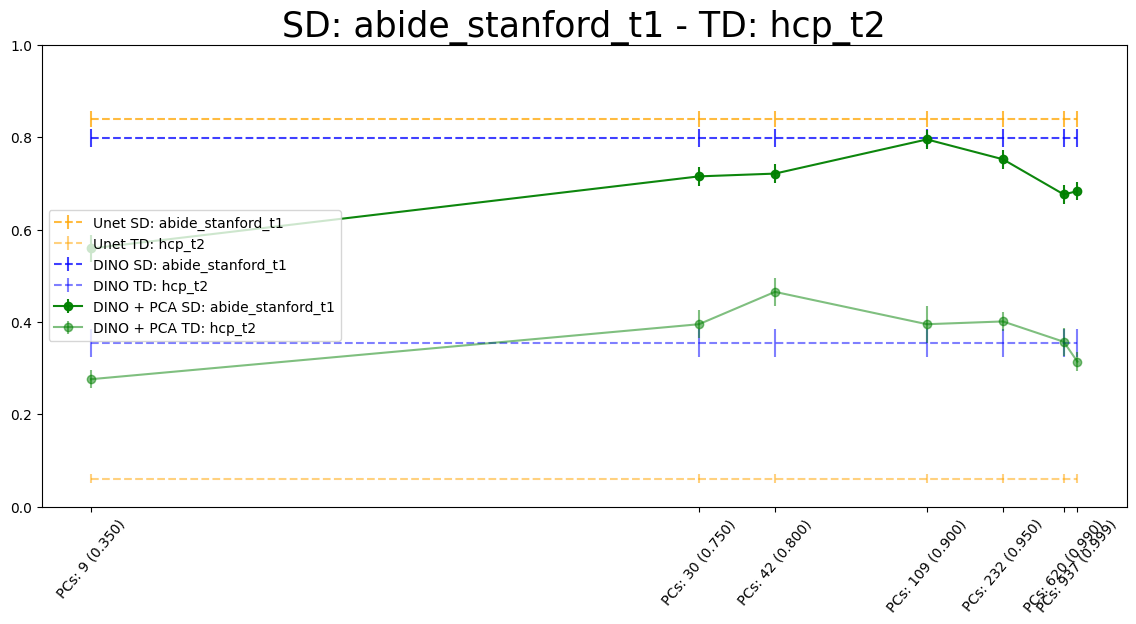

In [11]:
source_domain = 'abide_stanford_t1'
target_domains = ['hcp_t2']

unet_color = 'orange'
dino_color = 'blue'
dino_pca_color = 'green'

plot_unet = True

for target_domain in target_domains:
    # Get Unet source domain and target domain performance as horizontal lines with error bars
    unet_sd_mean = results_df[results_df.model_name == 'unet'][f"{source_domain}_mean"].values[0]
    unet_sd_std = results_df[results_df.model_name == 'unet'][f"{source_domain}_std"].values[0]

    unet_td_mean = results_df[results_df.model_name == 'unet'][f"{target_domain}_mean"].values[0]
    unet_td_std = results_df[results_df.model_name == 'unet'][f"{target_domain}_std"].values[0]

    # Get dino source domain and target domain performance as horizontal lines with error bars
    dino_sd_mean = results_df[results_df.model_name == 'dino_resnet_decoder'][f"{source_domain}_mean"].values[0]
    dino_sd_std = results_df[results_df.model_name == 'dino_resnet_decoder'][f"{source_domain}_std"].values[0]

    dino_td_mean = results_df[results_df.model_name == 'dino_resnet_decoder'][f"{target_domain}_mean"].values[0]
    dino_td_std = results_df[results_df.model_name == 'dino_resnet_decoder'][f"{target_domain}_std"].values[0]

    # Get the PCA source domain and target domain performance as horizontal lines with error bars
    pca_sd_mean = results_df[results_df.model_name == 'dino_resnet_decoder_on_pcs'][['num_pcs', 'explained_var', f"{source_domain}_mean"]]
    pca_sd_std = results_df[results_df.model_name == 'dino_resnet_decoder_on_pcs'][['num_pcs', 'explained_var', f"{source_domain}_std"]]
    
    pca_td_mean = results_df[results_df.model_name == 'dino_resnet_decoder_on_pcs'][['num_pcs', 'explained_var', f"{target_domain}_mean"]]
    pca_td_std = results_df[results_df.model_name == 'dino_resnet_decoder_on_pcs'][['num_pcs', 'explained_var', f"{target_domain}_std"]]

    x_var = pca_sd_mean['explained_var']
    x_pcs = pca_sd_mean['num_pcs']

    # Plot the results with error bars but using a scatter plot
    fig = plt.figure(figsize=(14, 6))

    # Plot Unet performance
    if plot_unet:
        plt.errorbar(x=x_var, y=[unet_sd_mean] * len(x_var), yerr=[unet_sd_std] * len(x_var), label=f"Unet SD: {source_domain}", fmt='--', color=unet_color, alpha = 0.75)
        plt.errorbar(x=x_var, y=[unet_td_mean] * len(x_var), yerr=[unet_td_std] * len(x_var), label=f"Unet TD: {target_domain}", fmt='--', color=unet_color, alpha = 0.5)    

    # Plot regular Dino Perfomance
    plt.errorbar(x=x_var, y=[dino_sd_mean] * len(x_var), yerr=[dino_sd_std] * len(x_var), label=f"DINO SD: {source_domain}", fmt='--', color=dino_color, alpha = 0.75)
    plt.errorbar(x=x_var, y=[dino_td_mean] * len(x_var), yerr=[dino_td_std] * len(x_var), label=f"DINO TD: {target_domain}", fmt='--', color=dino_color, alpha = 0.5)

    plt.errorbar(x=pca_sd_mean['explained_var'], y=pca_sd_mean[f"{source_domain}_mean"], 
                 yerr=pca_sd_std[f"{source_domain}_std"], label=f"DINO + PCA SD: {source_domain}", 
                 fmt='-o', color=dino_pca_color, alpha = 0.95)
    plt.errorbar(x=pca_td_mean['explained_var'], y=pca_td_mean[f"{target_domain}_mean"], 
                 yerr=pca_td_std[f"{target_domain}_std"], label=f"DINO + PCA TD: {target_domain}", 
                 fmt='-o', color=dino_pca_color, alpha = 0.5)

    # Display only ticks for the actual values in the x-axis of the plot, whiile using log scale
    plt.xticks(x_var, [f'PCs: {int(pc)} ({var:.3f})' for pc, var in zip(x_pcs, x_var)], rotation=50)
    
    # make y-axis between 0 and 1
    plt.ylim(0, 1)
    plt.legend()
    plt.title(f"SD: {source_domain} - TD: {target_domain}", fontdict={'fontsize': 25})

    plt.show()


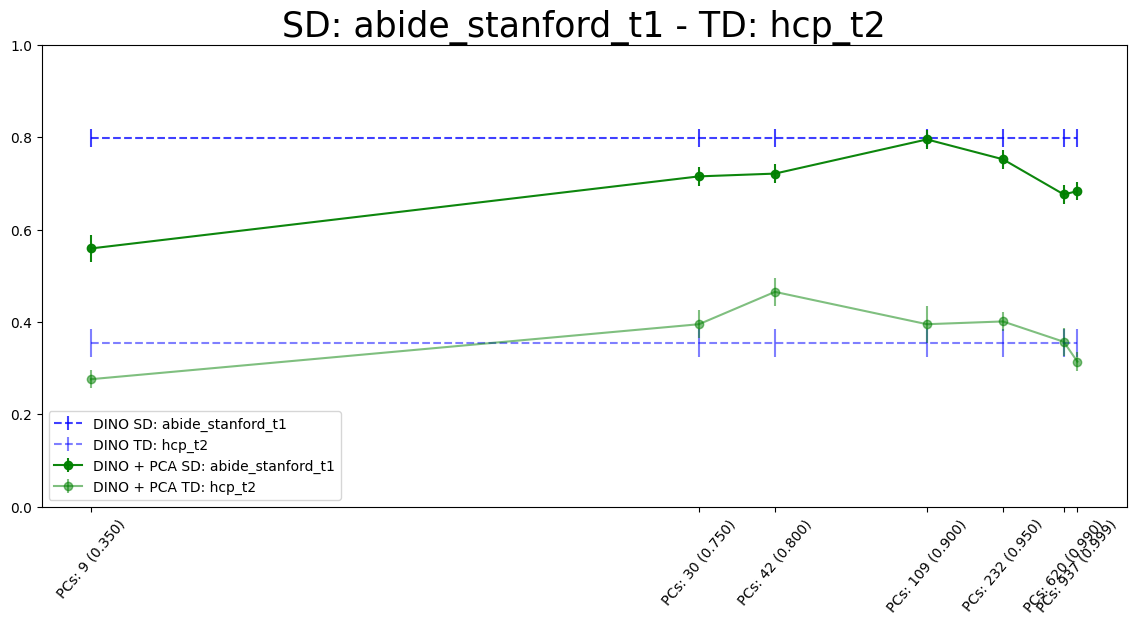

In [12]:

plot_unet = False

for target_domain in target_domains:
    # Get Unet source domain and target domain performance as horizontal lines with error bars
    unet_sd_mean = results_df[results_df.model_name == 'unet'][f"{source_domain}_mean"].values[0]
    unet_sd_std = results_df[results_df.model_name == 'unet'][f"{source_domain}_std"].values[0]

    unet_td_mean = results_df[results_df.model_name == 'unet'][f"{target_domain}_mean"].values[0]
    unet_td_std = results_df[results_df.model_name == 'unet'][f"{target_domain}_std"].values[0]

    # Get dino source domain and target domain performance as horizontal lines with error bars
    dino_sd_mean = results_df[results_df.model_name == 'dino_resnet_decoder'][f"{source_domain}_mean"].values[0]
    dino_sd_std = results_df[results_df.model_name == 'dino_resnet_decoder'][f"{source_domain}_std"].values[0]

    dino_td_mean = results_df[results_df.model_name == 'dino_resnet_decoder'][f"{target_domain}_mean"].values[0]
    dino_td_std = results_df[results_df.model_name == 'dino_resnet_decoder'][f"{target_domain}_std"].values[0]

    # Get the PCA source domain and target domain performance as horizontal lines with error bars
    pca_sd_mean = results_df[results_df.model_name == 'dino_resnet_decoder_on_pcs'][['num_pcs', 'explained_var', f"{source_domain}_mean"]]
    pca_sd_std = results_df[results_df.model_name == 'dino_resnet_decoder_on_pcs'][['num_pcs', 'explained_var', f"{source_domain}_std"]]
    
    pca_td_mean = results_df[results_df.model_name == 'dino_resnet_decoder_on_pcs'][['num_pcs', 'explained_var', f"{target_domain}_mean"]]
    pca_td_std = results_df[results_df.model_name == 'dino_resnet_decoder_on_pcs'][['num_pcs', 'explained_var', f"{target_domain}_std"]]

    x_var = pca_sd_mean['explained_var']
    x_pcs = pca_sd_mean['num_pcs']

    # Plot the results with error bars but using a scatter plot
    fig = plt.figure(figsize=(14, 6))

    # Plot Unet performance
    if plot_unet:
        plt.errorbar(x=x_var, y=[unet_sd_mean] * len(x_var), yerr=[unet_sd_std] * len(x_var), label=f"Unet SD: {source_domain}", fmt='--', color=unet_color, alpha = 0.75)
        plt.errorbar(x=x_var, y=[unet_td_mean] * len(x_var), yerr=[unet_td_std] * len(x_var), label=f"Unet TD: {target_domain}", fmt='--', color=unet_color, alpha = 0.5)    

    # Plot regular Dino Perfomance
    plt.errorbar(x=x_var, y=[dino_sd_mean] * len(x_var), yerr=[dino_sd_std] * len(x_var), label=f"DINO SD: {source_domain}", fmt='--', color=dino_color, alpha = 0.75)
    plt.errorbar(x=x_var, y=[dino_td_mean] * len(x_var), yerr=[dino_td_std] * len(x_var), label=f"DINO TD: {target_domain}", fmt='--', color=dino_color, alpha = 0.5)

    plt.errorbar(x=pca_sd_mean['explained_var'], y=pca_sd_mean[f"{source_domain}_mean"], 
                 yerr=pca_sd_std[f"{source_domain}_std"], label=f"DINO + PCA SD: {source_domain}", 
                 fmt='-o', color=dino_pca_color, alpha = 0.95)
    plt.errorbar(x=pca_td_mean['explained_var'], y=pca_td_mean[f"{target_domain}_mean"], 
                 yerr=pca_td_std[f"{target_domain}_std"], label=f"DINO + PCA TD: {target_domain}", 
                 fmt='-o', color=dino_pca_color, alpha = 0.5)

    # Display only ticks for the actual values in the x-axis of the plot, whiile using log scale
    plt.xticks(x_var, [f'PCs: {int(pc)} ({var:.3f})' for pc, var in zip(x_pcs, x_var)], rotation=50)
    
    # make y-axis between 0 and 1
    plt.ylim(0, 1)
    plt.legend()
    plt.title(f"SD: {source_domain} - TD: {target_domain}", fontdict={'fontsize': 25})

    plt.show()